In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Ejercicio 3
Esta pregunta utiliza los datos (tumores.csv). Se trata de un conjunto de datos de características del tumor cerebral que incluye cinco variables de primer orden y ocho de textura y cuatro parámetros de evaluación de la calidad con el nivel objetivo. Las variables son: Media, Varianza, Desviación estándar, Asimetría, Kurtosis, Contraste, Energía, ASM (segundo momento angular), Entropía, Homogeneidad, Disimilitud, Correlación, Grosor, PSNR (Pico de la relación señal-ruido), SSIM (Índice de Similitud Estructurada), MSE (Mean Square Error), DC (Coeficiente de Dados) y la variable a predecir tipo (1 = Tumor, 0 = No-Tumor).

##Ejercicio 3.1
Use el método de K vecinos más cercanos para generar un modelo predictivo para la tabla tumores.csv usando el 75 % de los datos para la tabla aprendizaje y un 25 % para la tabla testing. No olvide recodificar la variable a predecir como categórica

In [6]:
datos_tumores = pd.read_csv('tumores.csv', header=0, sep=',', decimal='.', index_col=0)

datos_tumores['tipo'] = datos_tumores['tipo'].astype('category')


train, test = train_test_split(datos_tumores, test_size=0.25, stratify=datos_tumores['tipo'], random_state=42)

print(train.shape)
print(test.shape)

(956, 17)
(319, 17)


<ipython-input-15-39f5c283e81d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='tipo', data=datos_tumores, palette="Set3")


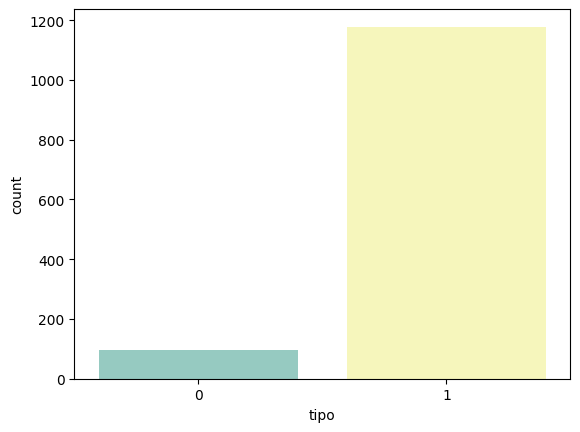

In [15]:
#Graficar distribucion de la variable a predecir
sns.countplot(x='tipo', data=datos_tumores, palette="Set3")
plt.show()

## Ejercicio 3.2
Genere un Modelo Predictivo usando K vecinos más cercanos

In [10]:
X_train = train.drop(columns=['tipo']) #variables predictoras
y_train = train['tipo'] #variable objetivo

X_test = test.drop(columns=['tipo'])
y_test = test['tipo']


#crear instancia del clasificador
knn_model = KNeighborsClassifier(
    n_neighbors=11,       # El valor de n_neighbors es 11
    weights='distance',   # El tipo de ponderación es 'distance'
    metric='manhattan',   # La métrica de distancia es 'manhattan'
    algorithm='auto'      # El algoritmo para la búsqueda de vecinos es 'auto'
)

#entrenar el modelo
knn_model.fit(X_train, y_train)


#predicion y evaluacion
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))


Accuracy: 0.9153605015673981
              precision    recall  f1-score   support

           0       0.20      0.04      0.07        24
           1       0.93      0.99      0.96       295

    accuracy                           0.92       319
   macro avg       0.56      0.51      0.51       319
weighted avg       0.87      0.92      0.89       319



In [11]:
#Definir rango de hiperparametros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 10, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos (uniforme o basado en la distancia)
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Métricas de distancia
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritmo para la búsqueda de vecinos
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,  # Validación cruzada con 5 pliegues
    scoring='accuracy'  # Métrica de evaluación (precisión)
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)

# Mejor modelo
best_knn = grid_search_knn.best_estimator_

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros para KNN:", grid_search_knn.best_params_)

Mejores parámetros para KNN: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


#Ejercicio 4
Esta pregunta utiliza los datos sobre la conocida historia y tragedia del Titanic, usando los datos titanicV2020.csv de los pasajeros se trata de predecir la supervivencia o no de un pasajero. La tabla contiene 12 variables y 1309 observaciones, las variables son:

PassegerId: El código de identificación del pasajero (valor único).
Survived: Variable a predecir, 1 (el pasajero sobrevivió) 0 (el pasajero no sobrevivió).
Pclass: En que clase viajaba el pasajero (1 = primera, 2 = segunda , 3 = tercera).
Name: Nombre del pasajero (valor único).
Sex: Sexo del pasajero.
Age: Edad del pasajero.
SibSp: Cantidad de hermanos o cónyuges a bordo del Titanic.
Parch: Cantidad de padres o hijos a bordo del Titanic.
Ticket: Número de tiquete (valor único).
Fare: Tarifa del pasajero.
Cabin: Número de cabina (valor único).
Embarked: Puerto donde embarco el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton).

##Ejercicio 4.1
Cargue la tabla de datos titanicV2020.csv, asegúrese re-codificar las variables cualitativas y de ignorar variables que no se deben usar.

In [20]:
datos_titanic = pd.read_csv('titanicV2020.csv', header=0, sep = ",", decimal =".", index_col=0)

#convertir columna tipo a categorica
datos_titanic['Survived'] = datos_titanic['Survived'].astype('category')

# Convertir 'Pclass' en un tipo de datos categórico ordenado
datos_titanic['Pclass'] = pd.Categorical(datos_titanic['Pclass'], ordered=True)

# Eliminar columnas no deseadas ('Name', 'Ticket', 'Cabin')
datos_titanic = datos_titanic.drop(columns=['Name', 'Ticket', 'Cabin'])

# Eliminar filas con valores faltantes
datos_titanic = datos_titanic.dropna()


dimesiones = datos_titanic.shape
print(dimesiones)
print(datos_titanic.dtypes)

display(datos_titanic)

(1043, 8)
Survived    category
Pclass      category
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
dtype: object


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
1301,1,3,female,3.0,1,1,13.7750,S
1303,1,1,female,37.0,1,0,90.0000,Q
1304,1,3,female,28.0,0,0,7.7750,S


##Ejercicio 4.2
Realice un análisis exploratorio (estadísticas básicas) que incluya: el resumen numérico(media, desviación estándar, etc.), los valores atípicos, la correlación entre las variables, el poder predictivo de las variables predictoras. Interprete los resultados.

In [21]:
print(datos_titanic.describe())

               Age        SibSp        Parch         Fare
count  1043.000000  1043.000000  1043.000000  1043.000000
mean     29.813202     0.504314     0.421860    36.603024
std      14.366254     0.913080     0.840655    55.753648
min       0.170000     0.000000     0.000000     0.000000
25%      21.000000     0.000000     0.000000     8.050000
50%      28.000000     0.000000     0.000000    15.750000
75%      39.000000     1.000000     1.000000    35.077100
max      80.000000     8.000000     6.000000   512.329200


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


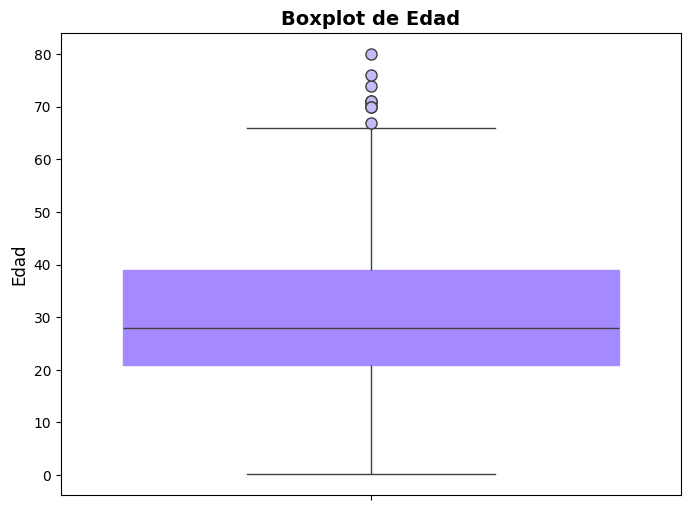

In [27]:
#datos atipicos
#boxplot para visualizar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y="Age", data=datos_titanic,
            boxprops=dict(facecolor="#c8b9f7", color="#a58aff"),
            flierprops=dict(markerfacecolor="#c8b9f7", marker='o', markersize=8, color="#a58aff"))

# Personalizar los títulos y etiquetas
plt.title("Boxplot de Edad", fontsize=14, fontweight='bold', ha='center')
plt.xlabel("")
plt.ylabel("Edad", fontsize=12)

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


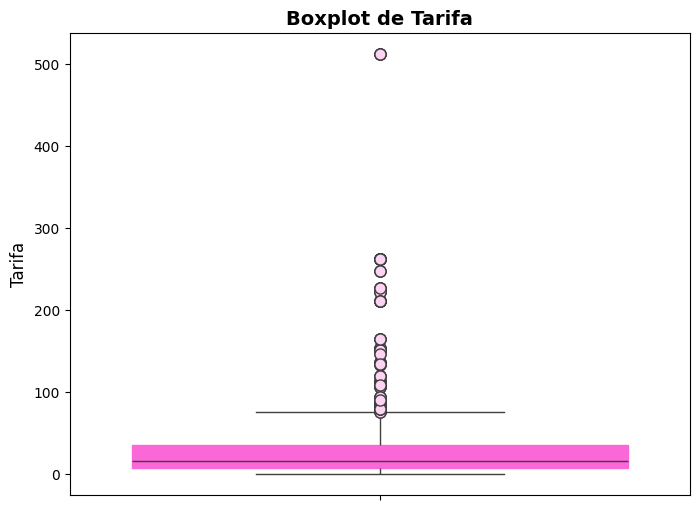

In [28]:
#datos atipicos
#boxplot para visualizar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y="Fare", data=datos_titanic,
            boxprops=dict(facecolor="#fdd3f4", color="#fa68d8"),
            flierprops=dict(markerfacecolor="#fdd3f4", marker='o', markersize=8, color="#fa68d8"))

# Personalizar los títulos y etiquetas
plt.title("Boxplot de Tarifa", fontsize=14, fontweight='bold', ha='center')
plt.xlabel("")
plt.ylabel("Tarifa", fontsize=12)

# Mostrar el gráfico
plt.show()

<Axes: >

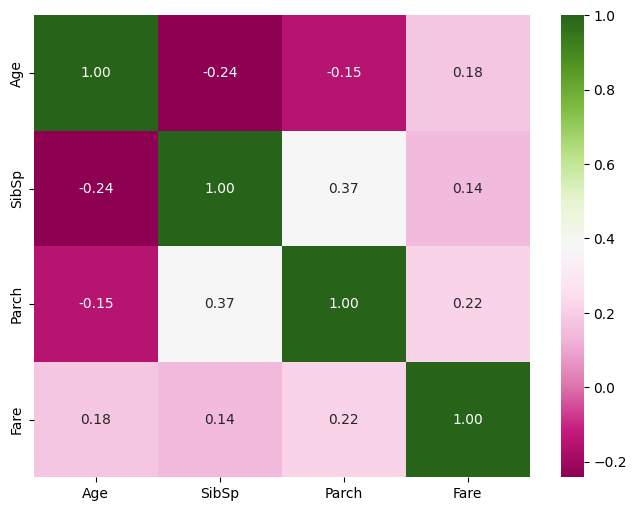

In [35]:
#grafico correlacion
# Include only numerical features for correlation calculation
numeric_data = datos_titanic.select_dtypes(include=np.number)
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='PiYG', fmt=".2f")

- No hay correlación fuerte entre edad y tarifa.
- Hay correlación positiva entre SibSp y Partch lo que refiere a familiares a bordo, si viajaban con hermanos o conyuges, también había más posibilidad de que también viajaran con hijos o padres.
- La edad tiene una relación negativa débil con el número de familiares a bordo, sugiriendo que los pasajeros más jóvenes tienden a viajar con más familiares.
- Las tarifas tienen una relación positiva débil con todas las variables, indicando una ligera tendencia a ser más altas para pasajeros de mayor edad o con más familiares.

<ipython-input-36-e8a3f899135c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=datos_titanic, palette="Set2")


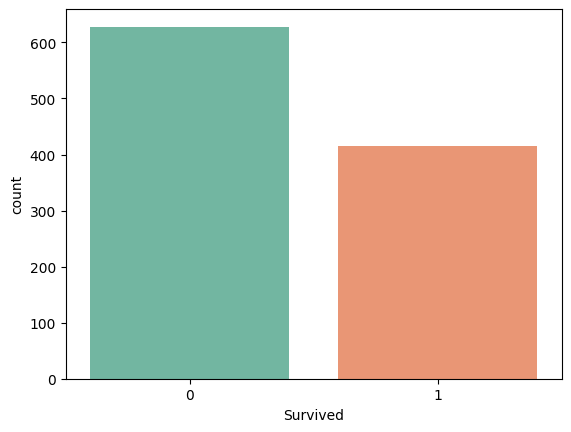

In [36]:
#Graficar distribucion de la variable a predecir
sns.countplot(x='Survived', data=datos_titanic, palette="Set2")
plt.show()

##Ejercicio 4.4
Use el método de K vecinos más cercanos, con los parámetros que logren el mejor resultado, para generar un modelo predictivo con la tabla titanicV2020.csv usando el 80 % de los datos para la tabla aprendizaje y un 20 % para la tabla testing, luego calcule para los datos de testing la matriz de confusión, la precisión global y la precisión para cada una de las dos categorías. ¿Son buenos los resultados?



In [38]:
train, test = train_test_split(datos_titanic, test_size=0.2, stratify=datos_titanic['Survived'], random_state=42)

print(train.shape)
print(test.shape)

(834, 8)
(209, 8)


In [46]:
X_train = train.drop(columns=['Survived']) #variables predictoras
y_train = train['Survived'] #variable objetivo

X_test = test.drop(columns=['Survived'])
y_test = test['Survived']

X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=True)


#crear instancia del clasificador
knn_model = KNeighborsClassifier(
    n_neighbors=10,       # El valor de n_neighbors es 11
    weights='distance',   # El tipo de ponderación es 'distance'
    metric='manhattan',   # La métrica de distancia es 'manhattan'
    algorithm='auto'      # El algoritmo para la búsqueda de vecinos es 'auto'
)

#entrenar el modelo
knn_model.fit(X_train, y_train)


#predicion y evaluacion
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
#precisión por categoria
print(classification_report(y_test, y_pred))

Accuracy: 0.6698564593301436
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       126
           1       0.58      0.59      0.59        83

    accuracy                           0.67       209
   macro avg       0.66      0.66      0.66       209
weighted avg       0.67      0.67      0.67       209



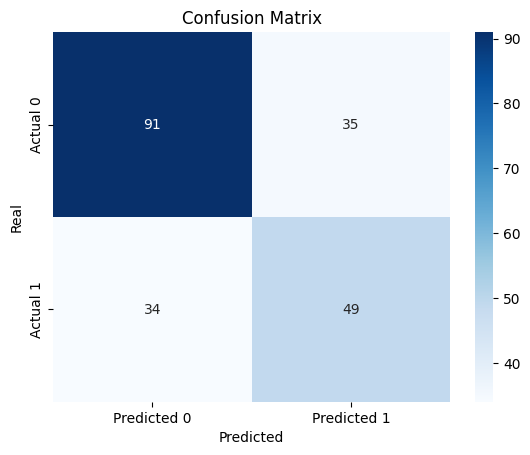

In [48]:
# Visualización de la Matriz de Confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Real')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

- Accuracy (Exactitud):

0.6699 (aproximadamente 67%)

Es la proporción de predicciones correctas (tanto para clase 0 como para clase 1) con respecto al total de predicciones. En este caso, el modelo acertó el 67% de las veces.

- Precision (Precisión):

Para la clase 0: 0.73 (73%)
De todas las veces que el modelo predijo que la clase era 0, el 73% de ellas fueron correctas.
Para la clase 1: 0.58 (58%)
De todas las veces que el modelo predijo que la clase era 1, el 58% de ellas fueron correctas.

- Recall (Recuperación o Sensibilidad):

Para la clase 0: 0.72 (72%)
De todas las veces que la clase verdadera fue 0, el modelo identificó correctamente el 72%.
Para la clase 1: 0.59 (59%)
De todas las veces que la clase verdadera fue 1, el modelo identificó correctamente el 59%.

- F1-Score:

Para la clase 0: 0.73 (73%)
Es una combinación de precisión y recall. El F1-score de 0.73 para la clase 0 indica un buen equilibrio entre precisión y recall.
Para la clase 1: 0.59 (59%)
El F1-score de 0.59 para la clase 1 es más bajo, lo que indica que el modelo tiene un desempeño más bajo en esta clase.

- Support:

126 instancias de la clase 0 (por ejemplo, no sobrevivientes).
83 instancias de la clase 1 (por ejemplo, sobrevivientes).
El número de instancias de cada clase en el conjunto de datos.

Promedios:

- Macro Average:
Promedio de todas las métricas (precisión, recall y F1) sin tener en cuenta el tamaño de las clases. Aquí, el modelo tiene un promedio de 0.66 en precisión, recall y F1.
- Weighted Average:
Promedio ponderado, tomando en cuenta el número de instancias de cada clase. Aquí, el modelo tiene un promedio de 0.67 en precisión, recall y F1.

Resumen:

El modelo tiene un buen desempeño en la clase 0 (con un F1-score de 0.73) pero un desempeño más bajo en la clase 1 (con un F1-score de 0.59).
La exactitud total es de aproximadamente 67%, lo que significa que el modelo hace predicciones correctas el 67% del tiempo.

In [41]:
#Definir rango de hiperparametros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 10, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos (uniforme o basado en la distancia)
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Métricas de distancia
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritmo para la búsqueda de vecinos
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=5,  # Validación cruzada con 5 pliegues
    scoring='accuracy'  # Métrica de evaluación (precisión)
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)

# Mejor modelo
best_knn = grid_search_knn.best_estimator_

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros para KNN:", grid_search_knn.best_params_)

Mejores parámetros para KNN: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


#Ejercicio 5
En este ejercicio vamos a predecir números escritos a mano (Hand Written Digit Recognition), la tabla de de datos está en el archivo ZipData 2020.csv. Los datos de este ejemplo vienen de los códigos postales escritos a mano en sobres del correo postal de EE.UU. Las imágenes son de 16 × 16 en escala de grises, cada píxel va de intensidad de −1 a 1 (de blanco a negro). Las imágenes se han normalizado para tener aproximadamente el mismo tamaño y orientación. La tarea consiste en predecir, a partir de la matriz de 16 × 16 de intensidades de cada píxel, la identidad de cada imagen (0, 1, . . . , 9) de forma rápida y precisa. Si es lo suficientemente precisa, el algoritmo resultante se utiliza como parte de un procedimiento de selección automática para sobres. Este es un problema de clasificación para el cual la tasa de error debe mantenerse muy baja para evitar la mala dirección de correo. La columna 1 tiene la variable a predecir Número codificada como sigue: 0=‘cero’; 1=‘uno’; 2=‘dos’; 3=‘tres’; 4=‘cuatro’; 5=‘cinco’;6=‘seis’; 7=‘siete’; 8=‘ocho’ y 9=‘nueve’, las demás columnas son las variables predictivas, además cada fila de la tabla representa un bloque 16 × 16 por lo que la matriz tiene 256 variables predictivas.

##Ejercicio 5.1
Cargue la tabla de datos ZipData_2020.csv en R.

In [49]:
datos_numeros = pd.read_csv('ZipData_2020.csv', header=0, sep = ";", decimal =".")
print(datos_numeros.dtypes)

Numero     object
V2        float64
V3        float64
V4        float64
V5        float64
           ...   
V253      float64
V254      float64
V255      float64
V256      float64
V257      float64
Length: 257, dtype: object


##Ejercicio 5.2
¿Es este problema equilibrado o desequilibrado? Justifique su respuesta.

<ipython-input-57-0048fd4b4268>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Numero', data = datos_numeros, palette="Spectral")


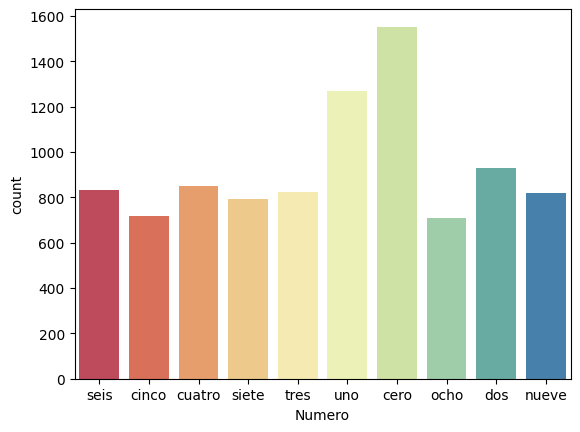

In [57]:
sns.countplot(x='Numero', data = datos_numeros, palette="Spectral")
plt.show()

Este problema es desequilibrado ya que hay una distribución desigual en la cantidad de individuos entre las diferentes categorías. Algunas categorías tienen muchos más individuos que otras como las categorías cero y uno que tienen una cantidad significativamente mayor de individuos (alrededor de 1500 y 1250 respectivamente) en comparación con otras como cinco y ocho que tienen menos de la mitad de individuos.

##Ejercicio 5.3
Use el método de K vecinos más cercanos para generar un modelo predictivo para la tabla ZipData 2020.csv usando el 80 % de los datos para la tabla aprendizaje y un 20 % para la tabla testing, luego calcule para los datos de testing la matriz de confusión, la precisión global y la precisión para cada una de las categorías. ¿Son buenos los resultados?

In [58]:
train, test = train_test_split(datos_numeros, test_size=0.2, stratify=datos_numeros['Numero'], random_state=42)

print(train.shape)
print(test.shape)

(7438, 257)
(1860, 257)


In [68]:
X_train_numero = train.drop(columns=['Numero']) #variables predictoras
y_train_numero = train['Numero'] #variable objetivo

X_test_numero = test.drop(columns=['Numero'])
y_test_numero = test['Numero']

#crear y entrenar modelo
knn_model_numero = KNeighborsClassifier(
    n_neighbors=3,       # El valor de n_neighbors es 11
    weights='distance',   # El tipo de ponderación es 'distance'
    metric='euclidean',   # La métrica de distancia es 'manhattan'
    algorithm='auto'      # El algoritmo para la búsqueda de vecinos es 'auto'
)

#entrenar el modelo
knn_model.fit(X_train_numero, y_train_numero)


#predicion y evaluacion
y_pred = knn_model.predict(X_test_numero)
accuracy = accuracy_score(y_test_numero, y_pred)
print(f'Accuracy: {accuracy}')
conf_matrix = confusion_matrix(y_test_numero, y_pred)
#precisión por categoria
print(classification_report(y_test_numero, y_pred))

Accuracy: 0.9543010752688172
              precision    recall  f1-score   support

        cero       0.93      0.99      0.96       311
       cinco       0.96      0.94      0.95       143
      cuatro       0.96      0.89      0.92       170
         dos       0.98      0.88      0.93       186
       nueve       0.93      0.97      0.95       164
        ocho       0.99      0.93      0.96       142
        seis       0.95      0.95      0.95       167
       siete       0.93      0.98      0.96       158
        tres       0.98      0.97      0.97       165
         uno       0.96      1.00      0.98       254

    accuracy                           0.95      1860
   macro avg       0.96      0.95      0.95      1860
weighted avg       0.96      0.95      0.95      1860



In [67]:
#Definir rango de hiperparametros
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 10, 11],  # Número de vecinos
    'weights': ['uniform', 'distance'],  # Peso de los vecinos (uniforme o basado en la distancia)
    'metric': ['euclidean', 'manhattan', 'chebyshev'],  # Métricas de distancia
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algoritmo para la búsqueda de vecinos
}

# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search_knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid_knn,
    cv=2,  # Validación cruzada con 5 pliegues
    scoring='accuracy'  # Métrica de evaluación (precisión)
)

# Ajustar el modelo con los datos de entrenamiento
grid_search_knn.fit(X_train_numero, y_train_numero)

# Mejor modelo
best_knn = grid_search_knn.best_estimator_

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros para KNN:", grid_search_knn.best_params_)

Mejores parámetros para KNN: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
